Размер картинки = (960, 1280, 3)
Координаты от верхнего левого угла
Координата x = 750
Координата y = 289


Text(0.5, 1.0, 'Пример распознавания центра черного пятна')

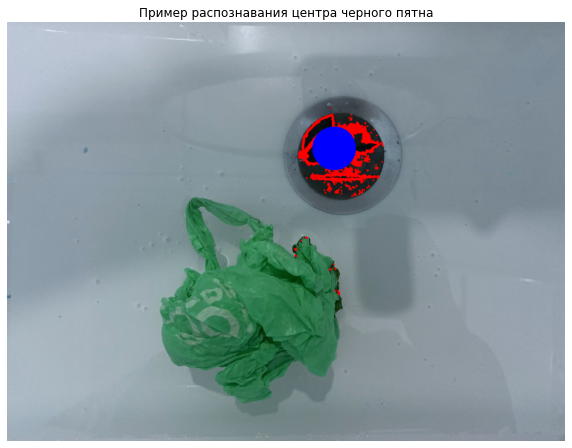

In [30]:
import requests
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt #for colab

# для загрузки файла из сети, потом заменим на объект из дрона
response = requests.get('https://github.com/ashmarev/triada/raw/main/0.jpeg')
image_byte_str = response.content
img_array = np.frombuffer(image_byte_str, np.uint8)
img = cv.imdecode(img_array, cv.IMREAD_COLOR)
#img = cv.imread(fn)

# меняем цветовую модель с BGR на HSV 
hsv = cv.cvtColor( img, cv.COLOR_BGR2HSV ) 
# применяем цветовой фильтр
# https://stackoverflow.com/questions/10948589/choosing-the-correct-upper-and-lower-hsv-boundaries-for-color-detection-withcv
hsv_min = np.array((0, 0, 0), np.uint8) #black
hsv_max = np.array((180, 255, 25), np.uint8)
thresh = cv.inRange( hsv, hsv_min, hsv_max )

# ищем контуры и складируем их в переменную contours
contours_external, hierarchy_external = cv.findContours( thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# отображение контуров на исходной картинке
cv.drawContours( img, contours_external, -1, (255,0,0), 3, cv.LINE_AA, hierarchy_external, 1 )

# вычисляем координаты
moments = cv.moments(thresh, 1)
dM01 = moments['m01']
dM10 = moments['m10']
dArea = moments['m00']
# будем реагировать только на те моменты, которые содержать больше 20 пикселей
if dArea > 50:
  x = int(dM10 / dArea)
  y = int(dM01 / dArea)
  cv.circle(img, (x, y), 50, (0,0,255), -1)

print('Размер картинки = ' + str(img.shape))
print('Координаты от верхнего левого угла')
print ('Координата x = ' + str(x))
print ('Координата y = ' + str(y))
figsize = (10, 10)
fig = plt.figure(figsize=figsize)
plt.imshow(img)
plt.axis('off')
plt.title('Пример распознавания центра черного пятна')